Importar bibliotecas

In [39]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# **IMPORTAR DATOS**

In [17]:
drive.mount("Mi_carpeta")

Mounted at Mi_carpeta


In [22]:
%cd /content/Mi_carpeta/MyDrive/'proyectos personales'/'Proyecto Messi'/

/content/Mi_carpeta/MyDrive/proyectos personales/Proyecto Messi


In [23]:
%ls

primera-entrega-de-tu-proyecto-final-mateoocantos-data-set-mateo-cantos-messi.csv
Untitled0.ipynb


In [50]:
df = pd.read_csv("primera-entrega-de-tu-proyecto-final-mateoocantos-data-set-mateo-cantos-messi.csv", encoding='latin1')
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04-May,LaLiga,34,05-01-05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11-02-05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
5,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho
6,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho
7,05-Jun,Copa del Rey,Quarter-Finals,02-01-06,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly
8,05-Jun,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:01,RW,84,5:01,Left-footed shot,NaN
9,06-Jul,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:03,LW,59,1:02,Left-footed shot,Andres Iniesta


In [51]:
# Renombrar columnas para dar mas claridad
df.rename(columns={
    'index': 'Goal_ID',
    'Season': 'Season_Code',
    'Competition': 'Competition_Name',
    'Matchday': 'Matchday_Number',
    'Date': 'Match_Date',
    'Venue': 'Venue_HA',
    'Club': 'Team_Name',
    'Opponent': 'Opponent_Team',
    'Result': 'Match_Result',
    'Playing_Position': 'Player_Position',
    'Minute': 'Goal_Minute',
    'At_score': 'Score_When_Scored',
    'Type': 'Goal_Type',
    'Goal_assist': 'Goal_Assist_By'
}, inplace=True)

# Verificamos que se hayan renombrado bien
df.columns


Index(['Season_Code', 'Competition_Name', 'Matchday_Number', 'Match_Date',
       'Venue_HA', 'Team_Name', 'Opponent_Team', 'Match_Result',
       'Player_Position', 'Goal_Minute', 'Score_When_Scored', 'Goal_Type',
       'Goal_Assist_By'],
      dtype='object')

In [52]:
df.head(10)

,Season_Code,Competition_Name,Matchday_Number,Match_Date,Venue_HA,Team_Name,Opponent_Team,Match_Result,Player_Position,Goal_Minute,Score_When_Scored,Goal_Type,Goal_Assist_By
0,04-May,LaLiga,34,05-01-05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11-02-05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
5,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho
6,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho
7,05-Jun,Copa del Rey,Quarter-Finals,02-01-06,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly
8,05-Jun,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:01,RW,84,5:01,Left-footed shot,NaN
9,06-Jul,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:03,LW,59,1:02,Left-footed shot,Andres Iniesta


# **LIMPIEZA Y ESTANDARIZACION DE DATOS**

Inspeccionar valores nulos

In [53]:
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n")

Valores nulos por columna:
Season_Code            0
Competition_Name       0
Matchday_Number        0
Match_Date             0
Venue_HA               0
Team_Name              0
Opponent_Team          0
Match_Result           0
Player_Position        0
Goal_Minute            0
Score_When_Scored      0
Goal_Type              1
Goal_Assist_By       212
dtype: int64




**En nuestro conjunto de datos, la columna Goal_Assist_By  y Goal_Type  contienen valores nulos. Para asegurar la integridad del análisis, reemplazaremos los valores nulos en Goal_Assist_By con 'No assist' y en Goal_Type con 'Desconocido'.**

In [54]:
df['Goal_Assist_By'].fillna('No assist', inplace=True)
df['Goal_Type'].fillna('Desconocido', inplace=True)

# Verificamos si aún hay valores nulos
print("Valores nulos después de la limpieza:")
print(df.isnull().sum())

Valores nulos después de la limpieza:
Season_Code          0
Competition_Name     0
Matchday_Number      0
Match_Date           0
Venue_HA             0
Team_Name            0
Opponent_Team        0
Match_Result         0
Player_Position      0
Goal_Minute          0
Score_When_Scored    0
Goal_Type            0
Goal_Assist_By       0
dtype: int64


/tmp/ipython-input-1026222670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Goal_Assist_By'].fillna('No assist', inplace=True)
/tmp/ipython-input-1026222670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [55]:
print(df['Season_Code'].value_counts())

Season_Code
11-Dec    73
Dec-13    60
14/15     58
16/17     54
10-Nov    53
18/19     51
09-Oct    47
17/18     45
13/14     41
15/16     41
20/21     38
08-Sep    38
19/20     31
06-Jul    17
07-Aug    16
21/22     14
05-Jun     8
22/23      6
04-May     1
Name: count, dtype: int64


**El siguiente paso es estandarizar la columna Season_Code. Como se pudo observar en la inspección anterior , esta columna contenía varios formatos, como XX-Mon, Mon-YY y YY/YY. Para asegurar que todas las temporadas tengan un formato consistente, se define una función llamada standardize_season_v2 que convierte todos los valores al formato estándar YYYY/YY.**

In [67]:
# Función mejorada para estandarizar 'Season_Code'
def standardize_season_v3(season_code):
    season_code = str(season_code)
    # Formato 'YY/YY' (ej. 13/14)
    if '/' in season_code and len(season_code.split('/')[0]) == 2:
        year1 = int(season_code.split('/')[0]) + 2000
        year2 = int(season_code.split('/')[1]) + 2000
        return f"{year1}/{str(year2)[2:]}"
    # Formato 'XX-Mon' (ej. '04-May')
    elif '-' in season_code and season_code.split('-')[0].isdigit():
        year1 = int(season_code.split('-')[0]) + 2000
        year2 = year1 + 1
        return f"{year1}/{str(year2)[2:]}"
    # Formato 'Mon-YY' (ej. 'Dec-13')
    elif '-' in season_code and season_code.split('-')[1].isdigit():
        year1 = int(season_code.split('-')[1]) + 2000
        year2 = year1 + 1
        return f"{year1}/{str(year2)[2:]}"
    return season_code

# Aplicar la nueva función
df['Season_Code'] = df['Season_Code'].apply(standardize_season_v3)


Esta columna (Match_Date) contiene fechas en formatos inconsistentes, lo que dificulta su análisis. El siguiente bloque de código utiliza una función que itera a través de una lista de formatos de fecha comunes para convertir cada entrada a un formato datetime estándar. Esto nos permitirá realizar análisis temporales de manera precisa

In [69]:
# Lista de formatos de fecha comunes en el archivo
date_formats = [
    '%m-%d-%y', # 05-01-05
    '%d-%m-%y', # 05-01-05
    '%m/%d/%y', # 11/27/05
    '%Y-%m-%d'  # 2013-09-03
]

def parse_date(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT # Retorna un valor nulo si ningún formato funciona

df['Match_Date'] = df['Match_Date'].apply(parse_date)


# Verificamos los cambios
print("Primeras 10 fechas después de la estandarización:")
print(df['Match_Date'].head(10))
print("\nTipos de datos de las columnas después de la limpieza:")
print(df.dtypes)

Primeras 10 fechas después de la estandarización:
0   2005-05-01
1   2005-11-02
2   2005-11-27
3   2006-01-15
4   2006-01-22
5   2006-01-29
6   2006-01-29
7   2006-02-01
8   2006-02-18
9   2006-08-28
Name: Match_Date, dtype: datetime64[ns]

Tipos de datos de las columnas después de la limpieza:
Season_Code                     object
Competition_Name                object
Matchday_Number                 object
Match_Date              datetime64[ns]
Venue_HA                        object
Team_Name                       object
Opponent_Team                   object
Match_Result                    object
Player_Position                 object
Goal_Minute                     object
Score_When_Scored               object
Goal_Type                       object
Goal_Assist_By                  object
Full_Time_Home_Score             int64
Full_Time_Away_Score             int64
Score_Home                       int64
Score_Away                       int64
dtype: object


**Para poder analizar los resultados de los partidos y el momento de los goles, es necesario convertir las columnas Match_Result y Score_When_Scored de un formato de texto (ej. '2:0') a uno numérico.**

**El siguiente bloque de código divide estas columnas en pares de columnas numéricas que representan los puntajes de los equipos local y visitante.**

In [70]:
# Dividir 'Match_Result' en 'Full_Time_Home_Score' y 'Full_Time_Away_Score'
df[['Full_Time_Home_Score', 'Full_Time_Away_Score']] = df['Match_Result'].str.split(':', expand=True)
df['Full_Time_Home_Score'] = pd.to_numeric(df['Full_Time_Home_Score'], errors='coerce').fillna(0).astype(int)
df['Full_Time_Away_Score'] = pd.to_numeric(df['Full_Time_Away_Score'], errors='coerce').fillna(0).astype(int)

# Dividir 'Score_When_Scored' en 'Score_Home' y 'Score_Away'
df[['Score_Home', 'Score_Away']] = df['Score_When_Scored'].str.split(':', expand=True)
df['Score_Home'] = pd.to_numeric(df['Score_Home'], errors='coerce').fillna(0).astype(int)
df['Score_Away'] = pd.to_numeric(df['Score_Away'], errors='coerce').fillna(0).astype(int)

# Verificamos los cambios
print("Primeras 10 filas de las nuevas columnas:")
print(df[['Full_Time_Home_Score', 'Full_Time_Away_Score', 'Score_Home', 'Score_Away']].head(10))


Primeras 10 filas de las nuevas columnas:
   Full_Time_Home_Score  Full_Time_Away_Score  Score_Home  Score_Away
0                     2                     0           2           0
1                     5                     0           3           0
2                     4                     1           2           0
3                     2                     1           2           1
4                     2                     0           2           0
5                     0                     3           0           2
6                     0                     3           0           3
7                     2                     1           1           0
8                     5                     1           5           1
9                     2                     3           1           2


Como se puede ver en la salida, hemos creado con éxito las nuevas columnas numéricas. Esto nos permitirá realizar análisis matemáticos, como calcular el diferencial de goles, en futuras etapas del proyecto.

# Análisis y Visualización

# Contar el número de goles por temporada

/tmp/ipython-input-742900218.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season_Code', y='Total_Goles', data=goles_por_temporada, palette='viridis')


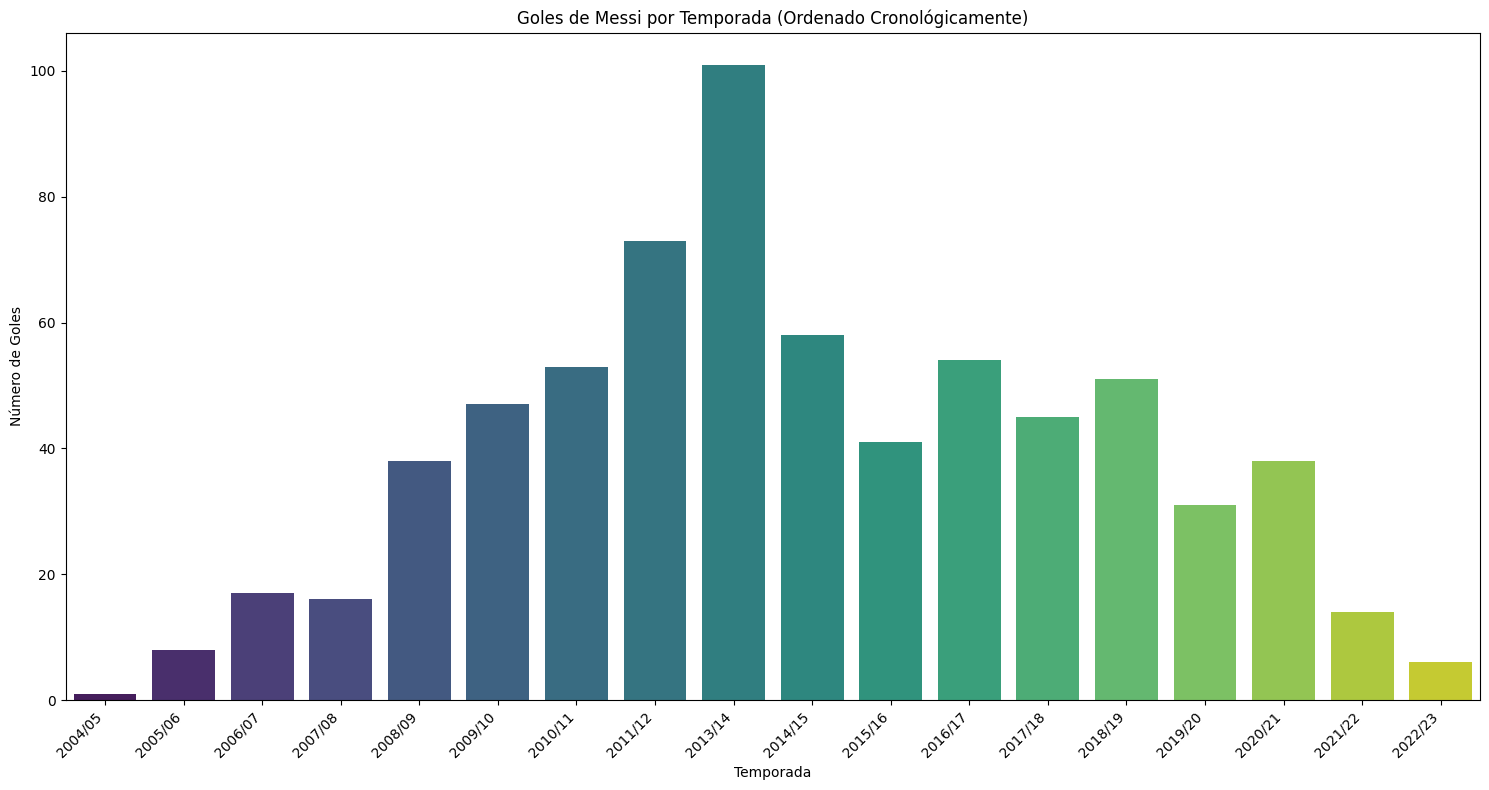

In [71]:
# Contar el número de goles por temporada
goles_por_temporada = df.groupby('Season_Code')['Goal_Minute'].count().reset_index()
goles_por_temporada.rename(columns={'Goal_Minute': 'Total_Goles'}, inplace=True)

# Ordenar las temporadas cronológicamente
goles_por_temporada['sort_key'] = goles_por_temporada['Season_Code'].str.split('/').str[0].astype(int)
goles_por_temporada = goles_por_temporada.sort_values(by='sort_key')

# Crear el gráfico
plt.figure(figsize=(15, 8))
sns.barplot(x='Season_Code', y='Total_Goles', data=goles_por_temporada, palette='viridis')
plt.title('Goles de Messi por Temporada (Ordenado Cronológicamente)')
plt.xlabel('Temporada')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Goles por Temporada: Creamos un gráfico de barras que muestra la cantidad de goles que Messi anotó en cada temporada, identificando sus años más productivos.

#  Contar el número de goles por competición

/tmp/ipython-input-233591971.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Competition_Name', y='Total_Goles', data=goles_por_competicion, palette='dark')


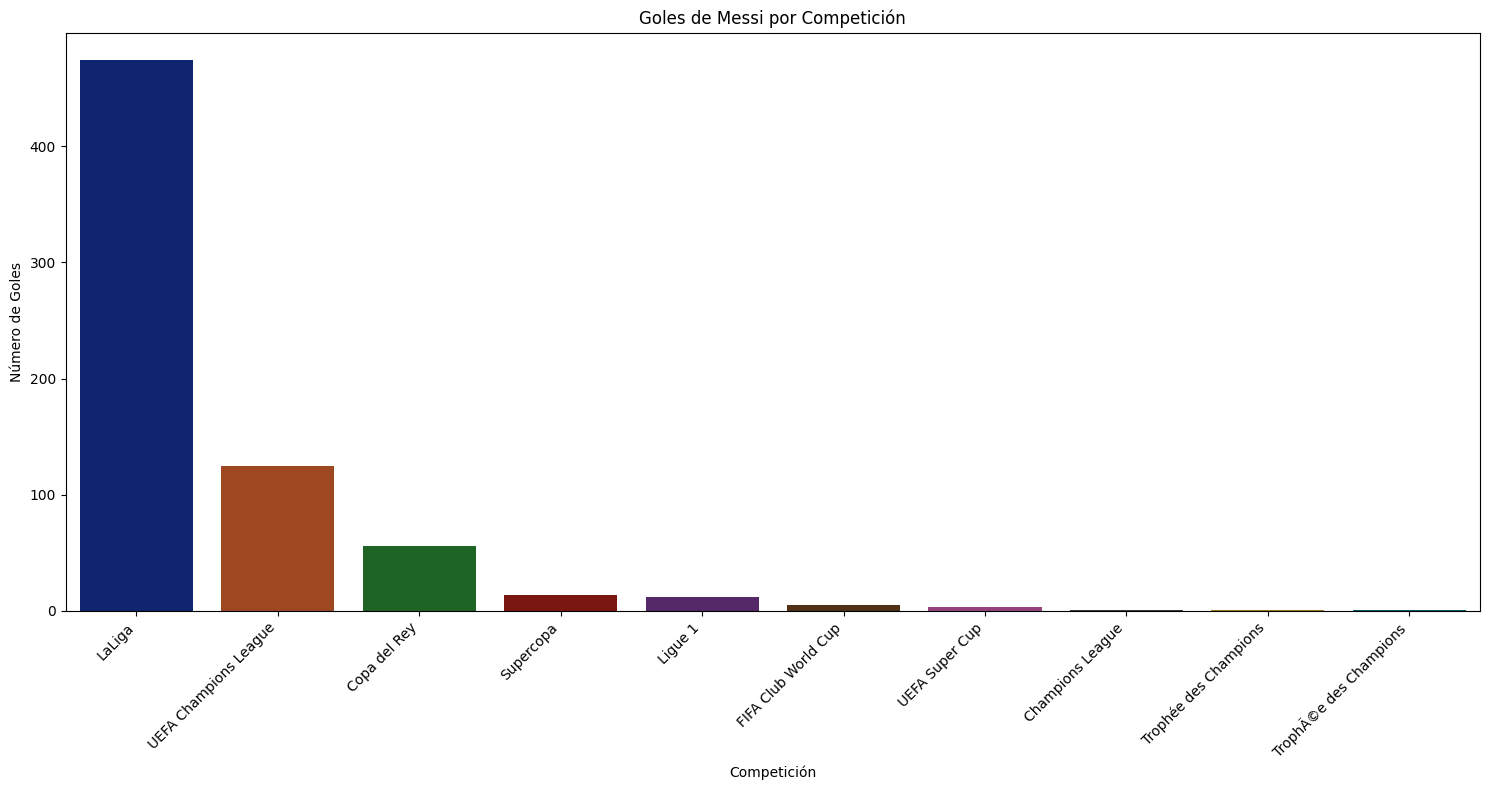

In [72]:
goles_por_competicion = df.groupby('Competition_Name')['Goal_Minute'].count().reset_index()
goles_por_competicion.rename(columns={'Goal_Minute': 'Total_Goles'}, inplace=True)
goles_por_competicion = goles_por_competicion.sort_values(by='Total_Goles', ascending=False)

# Crear el gráfico
plt.figure(figsize=(15, 8))
sns.barplot(x='Competition_Name', y='Total_Goles', data=goles_por_competicion, palette='dark')
plt.title('Goles de Messi por Competición')
plt.xlabel('Competición')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Goles por Competición: Visualizamos la distribución de sus goles por torneo, lo que nos permitió ver en qué competiciones ha sido más dominante.

# Contar el número de goles por tipo

/tmp/ipython-input-3731588092.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goal_Type', y='Count', data=goles_por_tipo, palette='mako')


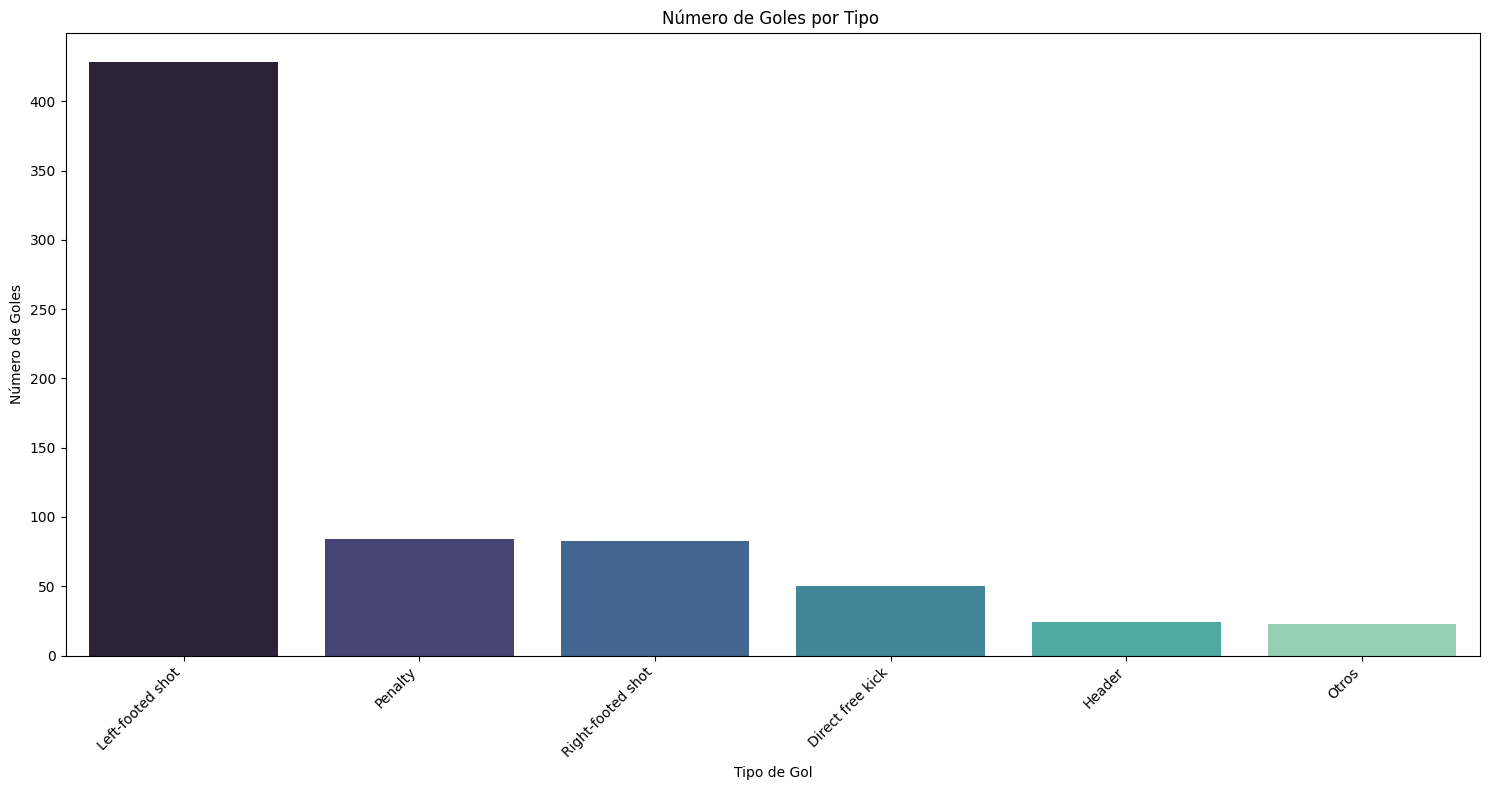

In [73]:
goles_por_tipo = df['Goal_Type'].value_counts().reset_index()
goles_por_tipo.columns = ['Goal_Type', 'Count']

# Agrupar las categorías pequeñas en 'Otros'
threshold = 10 # Goles mínimos para ser una categoría propia
other_types = goles_por_tipo[goles_por_tipo['Count'] < threshold]
goles_por_tipo = goles_por_tipo[goles_por_tipo['Count'] >= threshold]

if not other_types.empty:
    other_sum = other_types['Count'].sum()
    goles_por_tipo = pd.concat([goles_por_tipo, pd.DataFrame([{'Goal_Type': 'Otros', 'Count': other_sum}])], ignore_index=True)

goles_por_tipo = goles_por_tipo.sort_values(by='Count', ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x='Goal_Type', y='Count', data=goles_por_tipo, palette='mako')
plt.title('Número de Goles por Tipo ')
plt.xlabel('Tipo de Gol')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como se puede ver en el gráfico, el tipo de gol más común es con el 'Left-footed shot' (tiro con la pierna izquierda). El gráfico de barras nos permite visualizar claramente esta información

# Goles por minuto

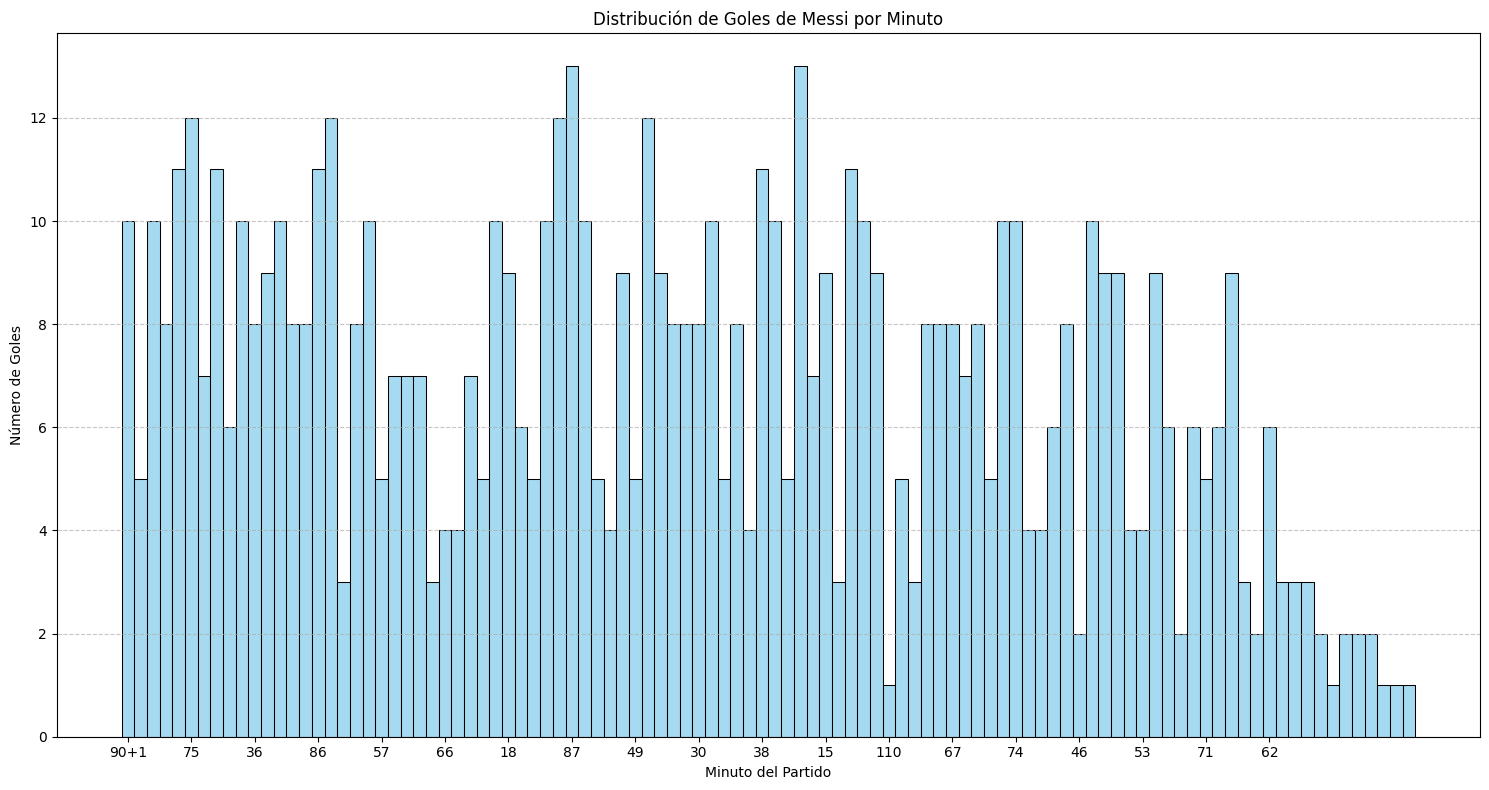

In [74]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Goal_Minute'], bins=90, kde=False, color='skyblue')
plt.title('Distribución de Goles de Messi por Minuto')
plt.xlabel('Minuto del Partido')
plt.ylabel('Número de Goles')
plt.xticks(range(0, 91, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Asistencias de Gol

Gráfico de barras que muestre a los 10 jugadores que más asistencias le dieron a Messi.

/tmp/ipython-input-2325051037.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Asistencias', y='Asistidor', data=top_10, palette='cubehelix')


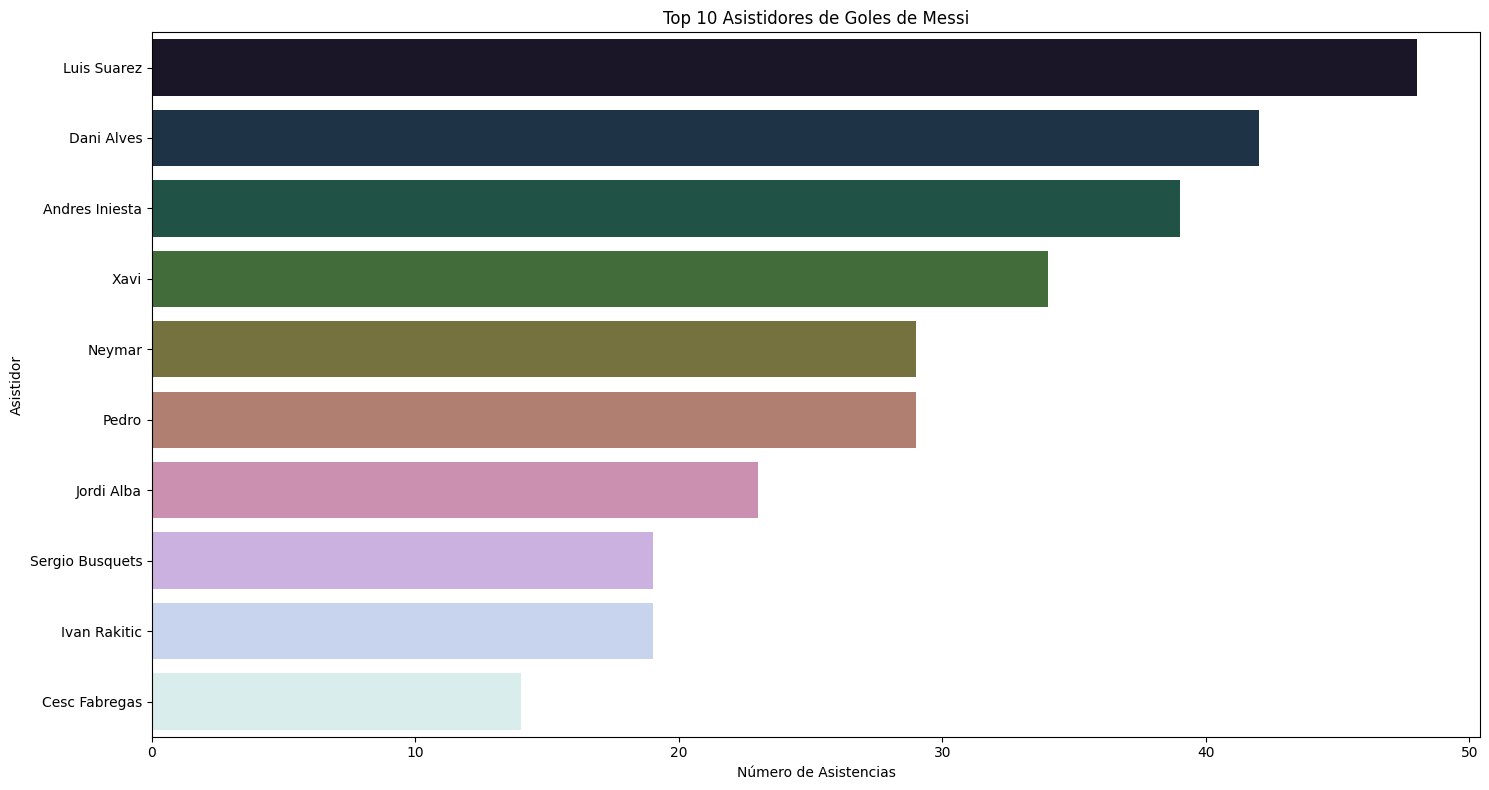

In [77]:
# Contar el número de asistencias por jugador
top_asistidores = df['Goal_Assist_By'].value_counts().reset_index()
top_asistidores.columns = ['Asistidor', 'Total_Asistencias']

# Excluir la categoría 'No assist' y tomar el top 10
top_asistidores = top_asistidores[top_asistidores['Asistidor'] != 'No assist']
top_10 = top_asistidores.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
sns.barplot(x='Total_Asistencias', y='Asistidor', data=top_10, palette='cubehelix')
plt.title('Top 10 Asistidores de Goles de Messi')
plt.xlabel('Número de Asistencias')
plt.ylabel('Asistidor')
plt.tight_layout()
plt.show()

In [78]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('messi_goles.csv', index=False)